In [66]:
from math import pi
import pandas as pd
import numpy as np
#importation du fichier

sales=pd.read_csv("Dataset_3_sales.csv", sep="|")
print(sales)
sales.describe() 


       Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0               0             0               0                 0   
1               1             1               1                 1   
2               2             2               2                 2   
3               3             3               3                 3   
4               4             4               4                 4   
...           ...           ...             ...               ...   
14199       14199         14199           14199             14199   
14200       14200         14200           14200             14200   
14201       14201         14201           14201             14201   
14202       14202         14202           14202             14202   
14203       14203         14203           14203             14203   

       Unnamed: 0.1.1.1.1 Unnamed: 0.1.1.1.1.1 Unnamed: 0.1.1.1.1.1.1  \
0                       0                    0                      0   
1                       1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,7101.500000,7101.500000,7101.500000,7101.500000,7101.500000,0.065953,141.004977,1997.830681,2181.288914
std,4100.485947,4100.485947,4100.485947,4100.485947,4100.485947,0.051459,62.086938,8.371664,1706.499616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,3550.750000,3550.750000,3550.750000,3550.750000,3550.750000,0.027036,94.012000,1987.000000,834.247400
50%,7101.500000,7101.500000,7101.500000,7101.500000,7101.500000,0.054021,142.247000,1999.000000,1794.331000
75%,10652.250000,10652.250000,10652.250000,10652.250000,10652.250000,0.094037,185.855600,2004.000000,3101.296400
max,14203.000000,14203.000000,14203.000000,14203.000000,14203.000000,0.328391,266.888400,2009.000000,13086.964800


In [67]:
#supression des colonnes inutiles

sales.drop(sales.iloc[:,0:10],1,inplace=True)


In [71]:
#compter les valeurs manquantes dans chaques colonnes

column_with_nan=sales.columns[sales.isnull().any()]
for column in column_with_nan:
    print(column,sales[column].isnull().sum())

Item_Weight 2434
Item_Fat_Content 50
Outlet_Size 4016
Item_Outlet_Sales 5681


In [72]:
#Suppression des valeurs manquantes 

sales=sales.dropna()

In [81]:
# vérification s'il y a encore des valeurs manquantes 

column_with_nan=sales.columns[sales.isnull().any()]
for column in column_with_nan:
    print(column,sales[column].isnull().sum())
print(sales)


     Item_Identifier Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.3          Low Fat         0.016047   
1              DRC01        5.92          Regular         0.019278   
2              FDN15        17.5          Low Fat         0.016760   
4              NCD19        8.93          Low Fat         0.000000   
5              FDP36      10.395          Regular         0.000000   
...              ...         ...              ...              ...   
8517           FDF53       20.75              reg         0.083607   
8518           FDF22       6.865          Low Fat         0.056783   
8520           NCJ29        10.6          Low Fat         0.035186   
8521           FDN46        7.21          Regular         0.145221   
8522           DRG01        14.8          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            O

In [84]:
#verification des doublons 

sales.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.75,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


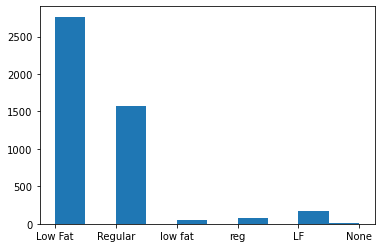

In [86]:
import matplotlib.pyplot as plt
plt.hist(sales.Item_Fat_Content)
plt.show()